In [3]:
import pandas as pd
#from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

In [5]:
iris = pd.read_csv('C:/Users/Nikhil Jain/Desktop/Code/Decision Tree and Random Forest/iris.csv')

In [7]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
y=iris['Species']
#del iris['Species']
x=iris
columns = ["Petal.Width", "Sepal.Length","Petal.Length"]
features = x[list(columns)].values
features
x=features
x

array([[0.2, 5.1, 1.4],
       [0.2, 4.9, 1.4],
       [0.2, 4.7, 1.3],
       [0.2, 4.6, 1.5],
       [0.2, 5. , 1.4],
       [0.4, 5.4, 1.7],
       [0.3, 4.6, 1.4],
       [0.2, 5. , 1.5],
       [0.2, 4.4, 1.4],
       [0.1, 4.9, 1.5],
       [0.2, 5.4, 1.5],
       [0.2, 4.8, 1.6],
       [0.1, 4.8, 1.4],
       [0.1, 4.3, 1.1],
       [0.2, 5.8, 1.2],
       [0.4, 5.7, 1.5],
       [0.4, 5.4, 1.3],
       [0.3, 5.1, 1.4],
       [0.3, 5.7, 1.7],
       [0.3, 5.1, 1.5],
       [0.2, 5.4, 1.7],
       [0.4, 5.1, 1.5],
       [0.2, 4.6, 1. ],
       [0.5, 5.1, 1.7],
       [0.2, 4.8, 1.9],
       [0.2, 5. , 1.6],
       [0.4, 5. , 1.6],
       [0.2, 5.2, 1.5],
       [0.2, 5.2, 1.4],
       [0.2, 4.7, 1.6],
       [0.2, 4.8, 1.6],
       [0.4, 5.4, 1.5],
       [0.1, 5.2, 1.5],
       [0.2, 5.5, 1.4],
       [0.2, 4.9, 1.5],
       [0.2, 5. , 1.2],
       [0.2, 5.5, 1.3],
       [0.1, 4.9, 1.4],
       [0.2, 4.4, 1.3],
       [0.2, 5.1, 1.5],
       [0.3, 5. , 1.3],
       [0.3, 4.5

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105, 3)
(105,)
(45, 3)
(45,)


In [11]:
dt=DecisionTreeClassifier(criterion="entropy")
dt_model=dt.fit(x_train,y_train)

In [12]:
dt_model.feature_importances_
list(zip(columns,dt_model.feature_importances_))

[('Petal.Width', 0.2862147187927312),
 ('Sepal.Length', 0.0270285920892557),
 ('Petal.Length', 0.686756689118013)]

In [13]:
from sklearn import tree
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(dt_model, out_file=f, feature_names=columns)

In [14]:
dt_prd=dt_model.predict(x_test)
print(accuracy_score(y_test,dt_prd))
df_confusion = confusion_matrix(y_test,dt_prd)
df_confusion

0.9555555555555556


array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

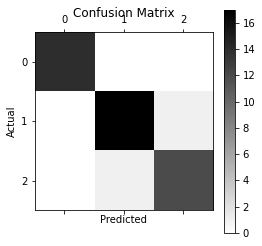

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plot_confusion_matrix(df_confusion)

In [17]:
print(metrics.classification_report(y_test,dt_prd))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [19]:
rf_clf=RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 10, random_state = 123)
rf_model=rf_clf.fit(x_train,y_train)
rf_prediction=rf_model.predict(x_test)

In [20]:
print(accuracy_score(y_test,rf_prediction))

0.9555555555555556


In [21]:
print(confusion_matrix(y_test,rf_prediction))

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


## GridSearchCV is used in model building to pass the hyperparameters as arguments to the models or estimators as the 
## Hyperparameters can't be learnt by estimators directly.Thus GridSearchCV facilitates us to optimize our model with the best parameters.

In [22]:
dt_parameters={"criterion":['gini','entropy'],"max_depth":[3,7],"max_leaf_nodes": [20,30]}

In [23]:
grid_dt_clf=GridSearchCV(DecisionTreeClassifier(),dt_parameters)

In [24]:
grid_dt_model=grid_dt_clf.fit(x_train,y_train)

In [25]:
grid_dt_model.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 20}

In [26]:
grid_dt_prediction=grid_dt_model.predict(x_test)

In [27]:
print(confusion_matrix(y_test,grid_dt_prediction))

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [28]:
print(accuracy_score(y_test,grid_dt_prediction))

0.9555555555555556


In [29]:
rf_params={"criterion":['gini','entropy'],"n_estimators":[10,20,30,40,50,60,100],"max_depth":[3,5,7,9],"max_leaf_nodes": [20,40,50]}

In [30]:
grid_rf_clf=GridSearchCV(RandomForestClassifier(),rf_params)

In [31]:
grid_rf_model=grid_rf_clf.fit(x_train,y_train)

In [32]:
grid_rf_model.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 20, 'n_estimators': 40}

In [33]:
grid_rf_prediction=grid_rf_model.predict(x_test)

In [34]:
print(accuracy_score(y_test,grid_rf_prediction))

0.9555555555555556
